$x_k$ minimalizuje $||b-\tilde A||_2^2$ dla $\tilde A = A + \Delta$.

twierdzenie Stewarta:
$\Delta := - \frac{rr^T}{||r||_2^2} A$, gdzie $r = b - Ax_k$
$||\Delta||_2 = \frac{1}{||r||_2^2} ||r\underbrace{r^T A}_{:=y^T}||_2 = \frac{1}{||r||^2_2} ||ry^T||_2 = ||r||_2^{-1} ||y^T||_2 = \frac{||A^T r||_2}{||r||_2}$
$A + \Delta = A - \frac{rr^T}{||r||^2} = \underbrace{(I - \frac{rr^T}{r^Tr})}_{=:P}A$,
gdzie macierz $P$ jest pewnym rzutem, tj. $P^2=P, P^T=P$.
$(PA)^TPAx_k - (PA)^Tb = 0?$
$A^TP^2Ax_k - A^TPb = A^TP(Ax_k - b) = 0$

TODO
wykres w zależności od $\alpha$ normy $\Delta$

In [11]:
import numpy as np

np.random.seed(42)

def make_test_data(M, N, rcond):  # rcond = sigma_N / sigma_1
    assert M >= N

    A = np.random.randn(M, N)
    U, _, VT = np.linalg.svd(A)
    V = VT.T

    Sigma = np.logspace(np.log10(rcond), 0., N)

    A = (U[:, :N] * Sigma) @ VT

    b = np.random.randn(M)

    x = V * (1 / Sigma) @ U[:, :N].T @ b

    return A, b, x

M, N = 100, 10
A, b, x = make_test_data(M, N, 1)

In [12]:
from sklearn.linear_model import *

def ridge_solve(A, b, alpha):
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(A, b)

    return ridge.coef_


def lasso_solve(A, b, alpha):
    lasso = Lasso(alpha=alpha, fit_intercept=False)
    lasso.fit(A, b)

    return lasso.coef_

def delta_norm(A, b, x):
    r = b - A @ x
    return np.linalg.norm(A.T @ r) / np.linalg.norm(r)

import matplotlib.pyplot as plt

m, n = -10, 0
alphas = np.logspace(m, n, 14)

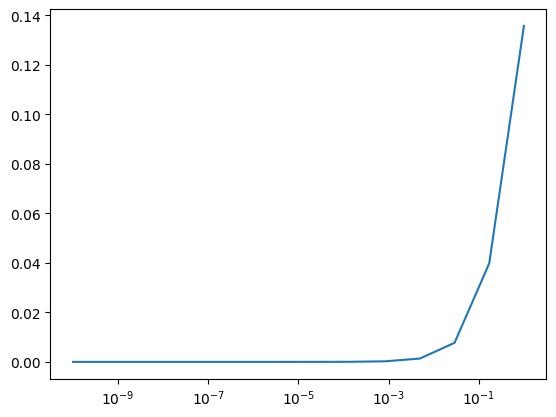

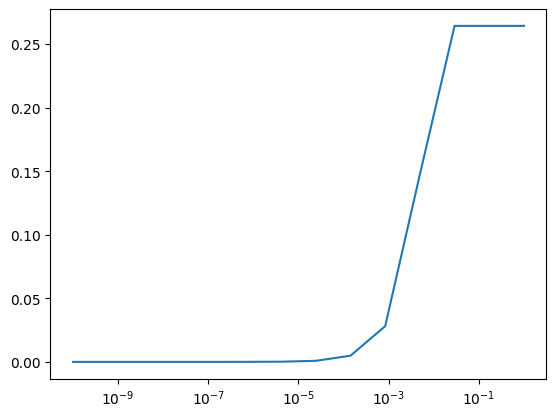

In [13]:
plt.plot(alphas, [delta_norm(A, b, ridge_solve(A, b, alpha)) for alpha in alphas])
plt.xscale("log")
plt.show()

plt.plot(alphas, [delta_norm(A, b, lasso_solve(A, b, alpha)) for alpha in alphas])
plt.xscale("log")
plt.show()

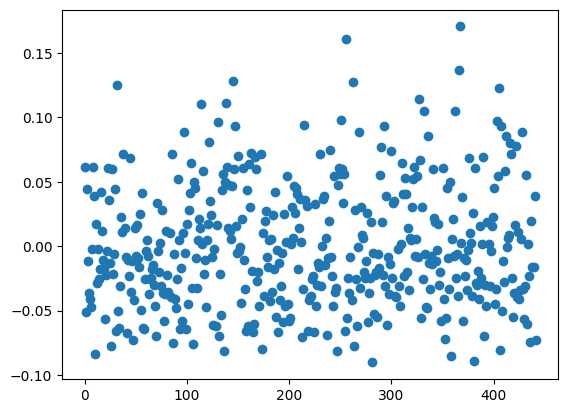

In [32]:
from sklearn import datasets
A, b = datasets.load_diabetes(return_X_y=True)
A = A[:,2]
plt.plot(A, 'o')
plt.show()

In [ ]:
def ridge_solve(A, b, alpha):
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(A, b)

    return ridge.coef_

x = ridge_solve(A, b, 1e-3)

# xs = np.arange(len(A))
# plt.plot(alphas, [ridge_solve(A, b, alpha) for alpha in alphas])
# plt.xscale("log")
# plt.show()